In [1]:
import numpy as np
from algorythms import *
from comparision import *

In [2]:
functions_to_test = []

## Inciso a

In [3]:
def fr_r(point):
  x, y = point
  return x**4 + y**4 - 4*x*y + 0.5*y + 1

In [4]:
def grad_f(point):
  """
  Calcula el gradiente de la función f(x, y).
  :param point: Punto en el que se evalúa el gradiente
  :return: Tuple con las derivadas parciales (df/dx, df/dy)
  """
  x, y = point
  df_dx = 4 * x**3 - 4 * y
  df_dy = 4 * y**3 - 4 * x + 0.5
  return np.array([df_dx, df_dy])

In [5]:
def hessian_f(point):
    """
    Calcula el hessiano de la función f(x, y).
    :param x: Valor de x
    :param y: Valor de y
    :return: Matriz 2x2 con las segundas derivadas parciales
    """
    x, y = point
    d2f_dx2 = 12 * x**2
    d2f_dy2 = 12 * y**2
    d2f_dxdy = -4
    d2f_dydx = -4
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dydx, d2f_dy2]])

Algoritmo                 Iteración  Valor de X                   Error Aproximado    Norma del Gradiente
----------------------  -----------  -------------------------  ------------------  ---------------------
descenso_aleatorio                1  [-3  1]                           2.84988              113.209
descenso_aleatorio                2  [-2.07958277  0.60906251]         1.96685               39.6215
descenso_aleatorio                3  [-1.08085911  0.65957039]         1.70539                9.73541
descenso_aleatorio               27  [-1.01463048 -1.0445298 ]         2.51542e-06            3.2137e-05
descenso_aleatorio               28  [-1.01463031 -1.0445317 ]         9.53674e-07            2.02097e-05
descenso_aleatorio               29  [-1.01462943 -1.04453209]         0                      1.87353e-05
max_naive                         1  [-3  1]                           3.98346              113.209
max_naive                         2  [0.5      0.484375]            

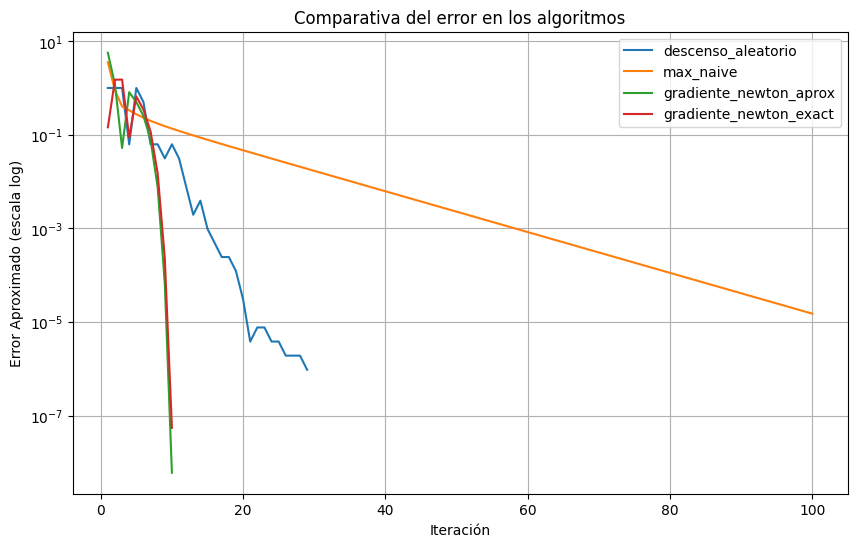

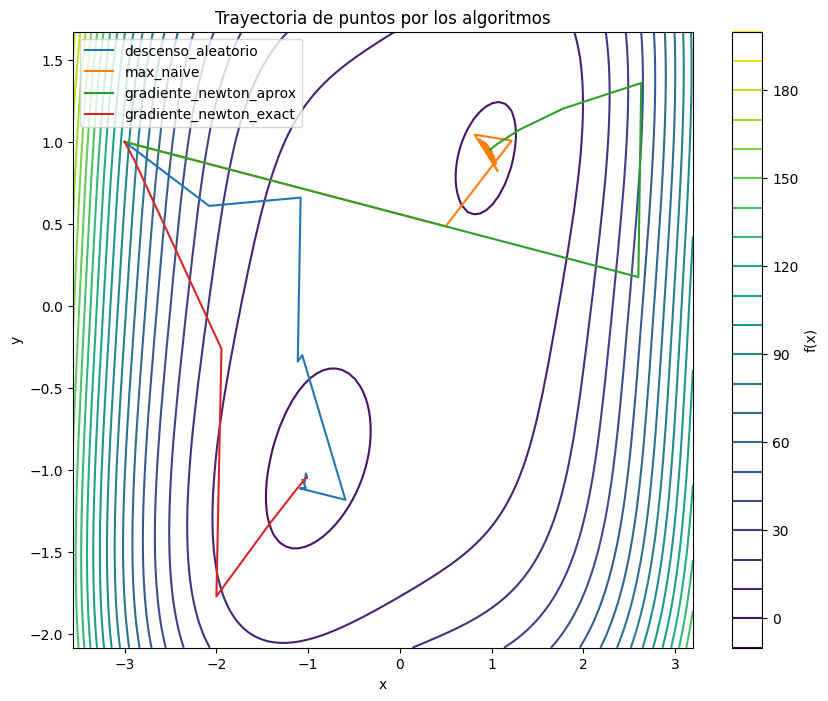

In [6]:
x0 = np.array([-3,1])
generate_table_and_plots(fr_r, grad_f, hessian_f, x0, 0.1, 100, 1e-6)

## Inciso b: Rosembrock 2-dimensional

In [7]:
def Rosembrock_2(point):
  x1, x2 = point
  return 100 * (x2 - x1**2)**2 + (1 - x1)**2

In [8]:
def grad_f(point):
    """
    Calcula el gradiente de la función de Rosenbrock en 2D.
    :param x1: Valor de x1
    :param x2: Valor de x2
    :return: Tuple con las derivadas parciales (df/dx1, df/dx2)
    """
    x1, x2 = point
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

In [9]:
def hessian_f(point):
    """
    Calcula el hessiano de la función de Rosenbrock en 2D.
    :param x1: Valor de x1
    :param x2: Valor de x2
    :return: Matriz 2x2 con las segundas derivadas parciales
    """
    x1, x2 = point
    d2f_dx1x1 = 1200 * x1**2 - 400 * x2 + 2
    d2f_dx2x2 = 200
    d2f_dx1x2 = -400 * x1
    d2f_dx2x1 = -400 * x1
    return np.array([[d2f_dx1x1, d2f_dx1x2], [d2f_dx2x1, d2f_dx2x2]])

Algoritmo                 Iteración  Valor de X                   Error Aproximado    Norma del Gradiente
----------------------  -----------  -------------------------  ------------------  ---------------------
descenso_aleatorio                1  [-3  1]                           1.91556                  9740.31
descenso_aleatorio                2  [-2.48324842  1.85613539]         1.28016                  4374.26
descenso_aleatorio                3  [-1.60417772  1.37944398]         0.5                       807.443
descenso_aleatorio                2  [-1.60417772  1.37944398]         0.5                       807.443
descenso_aleatorio                3  [-1.21368882  1.69172336]         0                         110.741
descenso_aleatorio                4  [-1.21368882  1.69172336]         0                         110.741
max_naive                         1  [-3  1]                           4.53816                  9740.31
max_naive                         2  [1.69140625 1.78125

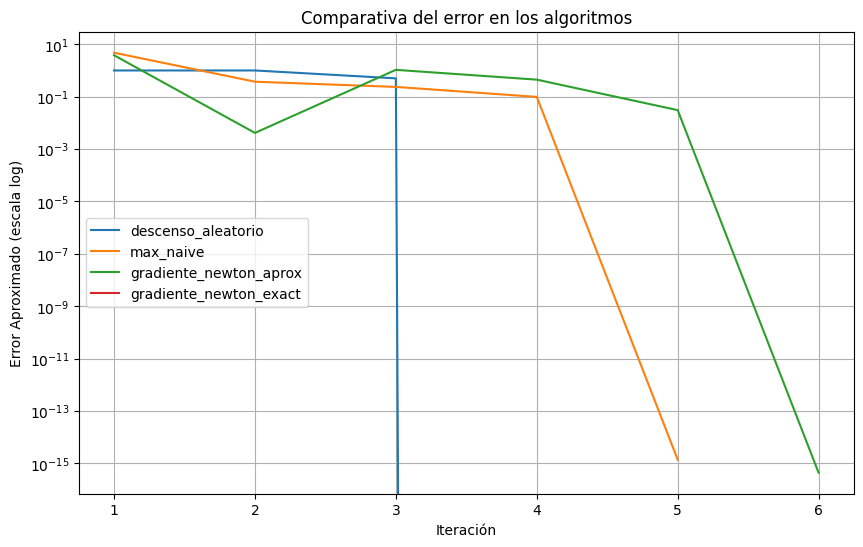

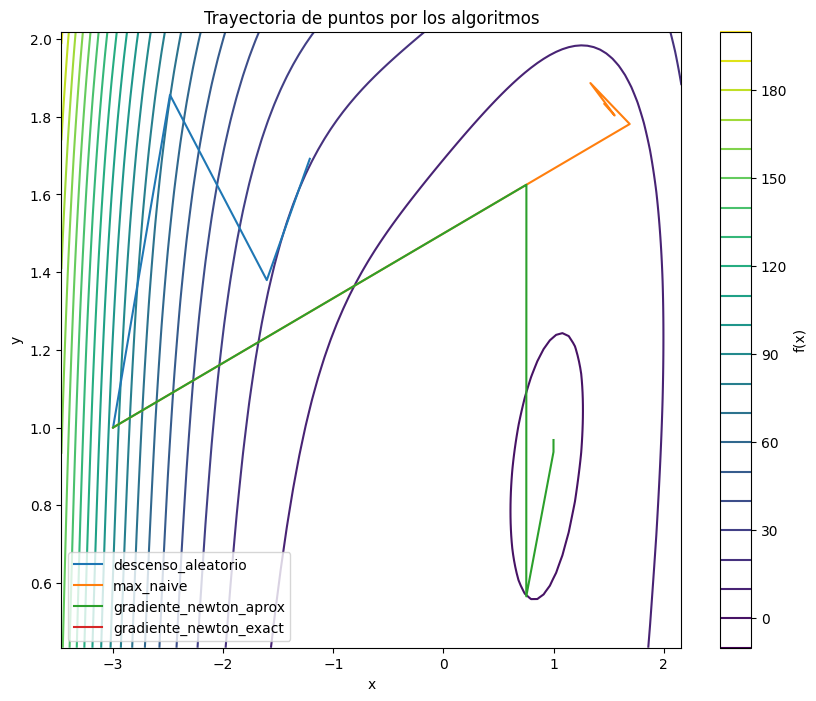

In [10]:
x0 = np.array([-3,1])
generate_table_and_plots(fr_r, grad_f, hessian_f, x0, 0.1, 100, 1e-6)

## Inciso c: Rosembrock 10-dimensional

In [11]:
def Rosembrock_10(point):
  x = point
  assert len(x) == 10, "La entrada debe ser un vector de longitud 10."
  return sum(100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(9))


In [12]:
def grad_f(point):
    """
    Calcula el gradiente de la función de Rosenbrock en 10 dimensiones.
    :param x: Vector de 10 elementos
    :return: Vector de 10 componentes con las derivadas parciales
    """
    x = point
    assert len(x) == 10, "La entrada debe ser un vector de longitud 10."
    grad = np.zeros(10)
    
    # Gradiente para i = 0,...,8
    for i in range(9):
        grad[i] += -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        grad[i+1] += 200 * (x[i+1] - x[i]**2)
    
    return grad

In [13]:
def hessian_f(point):
    """
    Calcula el hessiano de la función de Rosenbrock en 10 dimensiones.
    :param x: Vector de 10 elementos
    :return: Matriz 10x10 con las segundas derivadas parciales
    """
    x = point
    assert len(x) == 10, "La entrada debe ser un vector de longitud 10."
    hessian = np.zeros((10, 10))
    
    # Hessiano para términos diagonales y no diagonales
    for i in range(9):
        hessian[i, i] = 1200 * x[i]**2 - 400 * x[i+1] + 2
        hessian[i+1, i+1] = 200
        hessian[i, i+1] = -400 * x[i]
        hessian[i+1, i] = -400 * x[i]
    
    # Último término diagonal
    hessian[9, 9] = 200
    
    return hessian

Algoritmo                 Iteración  Valor de X                                                                  Error Aproximado    Norma del Gradiente
----------------------  -----------  ------------------------------------------------------------------------  ------------------  ---------------------
descenso_aleatorio                1  [-1.2  1.   1.   1.   1.   1.   1.   1.  -1.2  1. ]                              1.86263             1125.25
descenso_aleatorio                2  [-1.16405964  0.92334589  0.97145868  1.00948292  0.92378257  0.96217634         1.78198             1087.12
                                       1.12153935  0.96123109 -1.1899466   0.82446578]
descenso_aleatorio                3  [-1.26786631  0.8902314   0.9038607   1.01300011  1.08619824  0.97971672         1.79365             1041.67
                                       1.14813735  0.83250686 -1.21235375  0.78471943]
descenso_aleatorio               98  [-0.99785723  1.02535728  0.99308943  0.96816

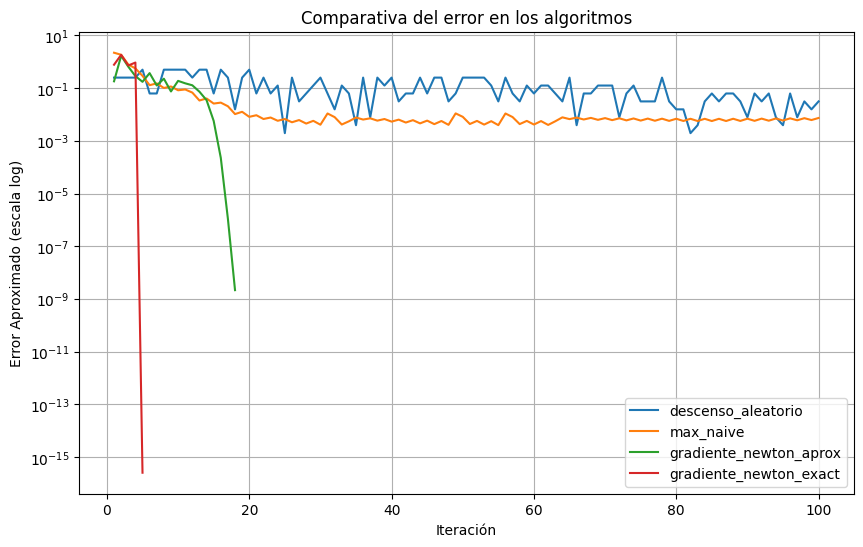

In [14]:
x0 = np.array([-1.2,1,1,1,1,1,1,1,-1.2,1])
generate_table_and_plots(Rosembrock_10, grad_f, hessian_f, x0, 0.1, 100, 1e-6)